In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [37]:
dfs = []
for w in ["win", "wfn", "wpgs", ""]:
    for seed in range(5):
        for opt in ["adam", "automl0", "lbfgs", "rmsprop", "cmaes", "std", "reopt-lbfgs", "reopt-rmsprop", "reopt-cmaes", "reopt-adam"]:
            try:
                opt_text = "std" if "reopt" in opt else opt
                reopt = f"_{opt.replace('reopt-', '')}-{w}" if "reopt" in opt else ""
                w_text = f"{w}_" if len(w) > 0 and not "reopt" in opt else ""
                tmp_df = pd.read_csv(f"../results/ga_diabetes_{opt_text}_{w_text}{seed}{reopt}.csv")
                tmp_df["seed"] = seed
                tmp_df["w"] = w if len(w) > 0 else "no w"
                tmp_df["opt"] = opt
                tmp_df["total_time"] = tmp_df["time"].cumsum().astype(int)
                dfs.append(tmp_df)
            except FileNotFoundError as e:
                pass
                # print(e)
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,test_accuracy,time,seed,w,opt,total_time
0,0.0,-3.548749,-4.521123,0.000000,0,win,adam,0
1,1.0,-3.209445,-4.091221,4.578942,0,win,adam,4
2,2.0,-3.119273,-3.977015,4.499662,0,win,adam,9
3,3.0,-3.044572,-3.882209,4.552120,0,win,adam,13
4,4.0,-2.966370,-3.783052,4.526593,0,win,adam,18


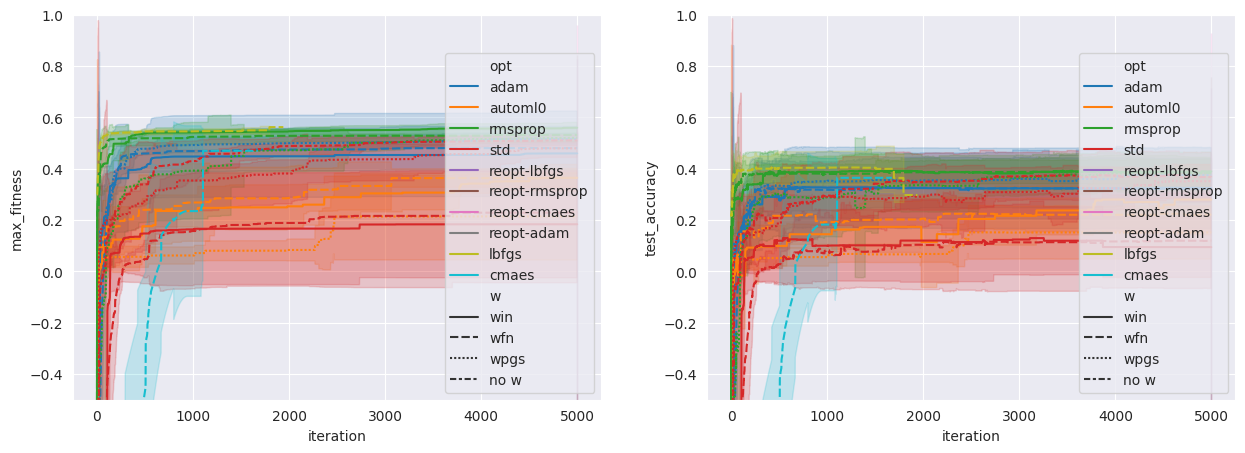

In [38]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
for idx, y in enumerate(["max_fitness", "test_accuracy"]):
    sns.lineplot(df, x="iteration", y=y, hue="opt", style="w", errorbar="sd", ax=axes[idx])
    axes[idx].set_ylim([-0.5, 1])
plt.show()

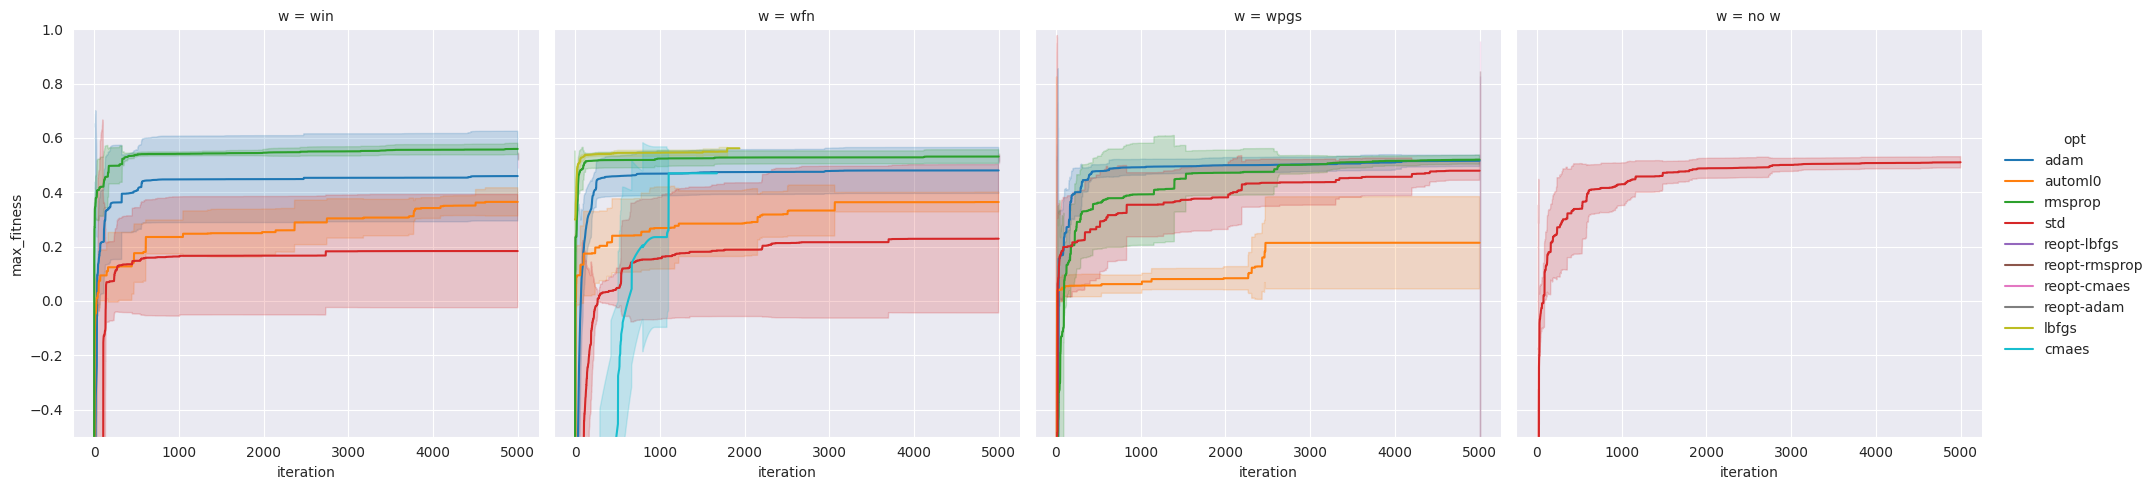

In [39]:
g = sns.relplot(df, x="iteration", y="max_fitness", hue="opt", kind="line", col="w", errorbar="sd")
g.set(ylim=(-0.5, 1))
plt.show()

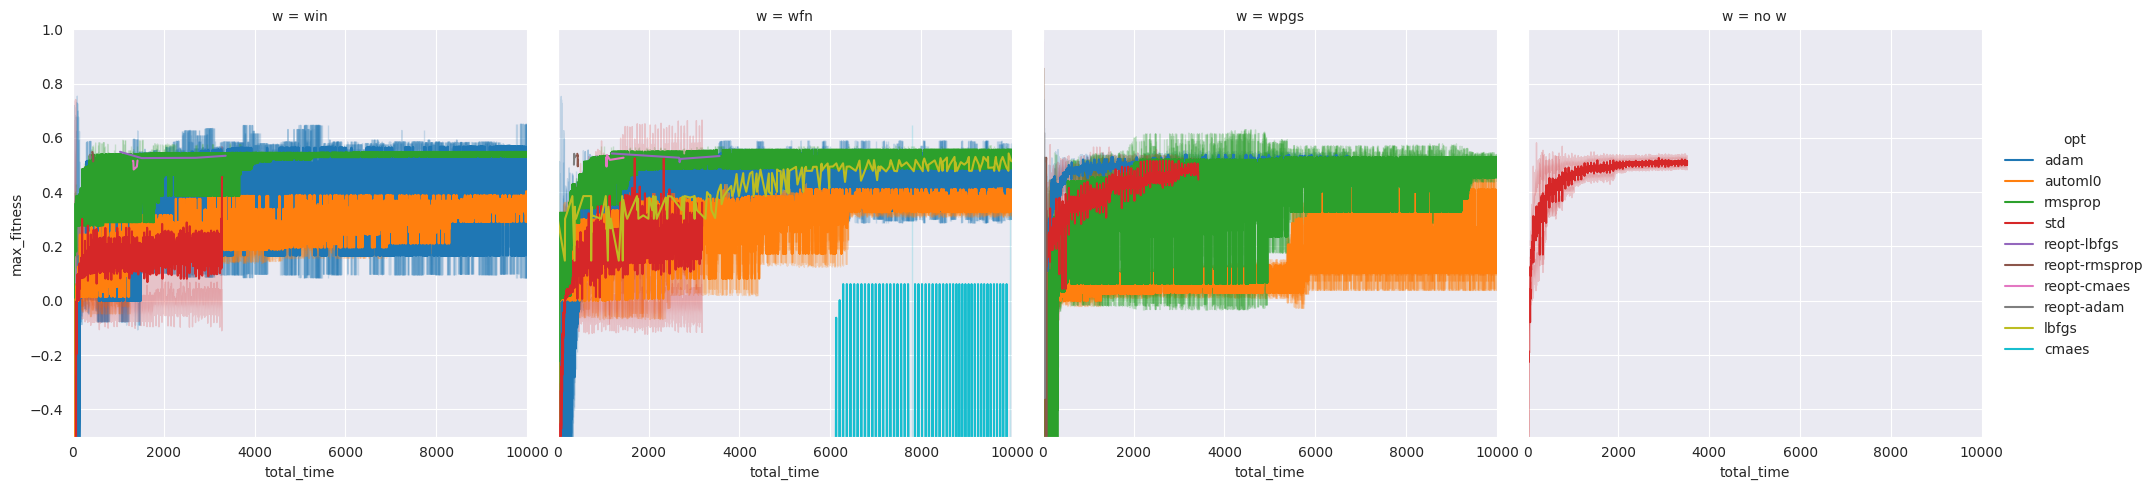

In [40]:
g = sns.relplot(df, x="total_time", y="max_fitness", hue="opt", kind="line", col="w", errorbar="sd")
g.set(ylim=(-0.5, 1))
g.set(xlim=(0, 10_000))
plt.show()

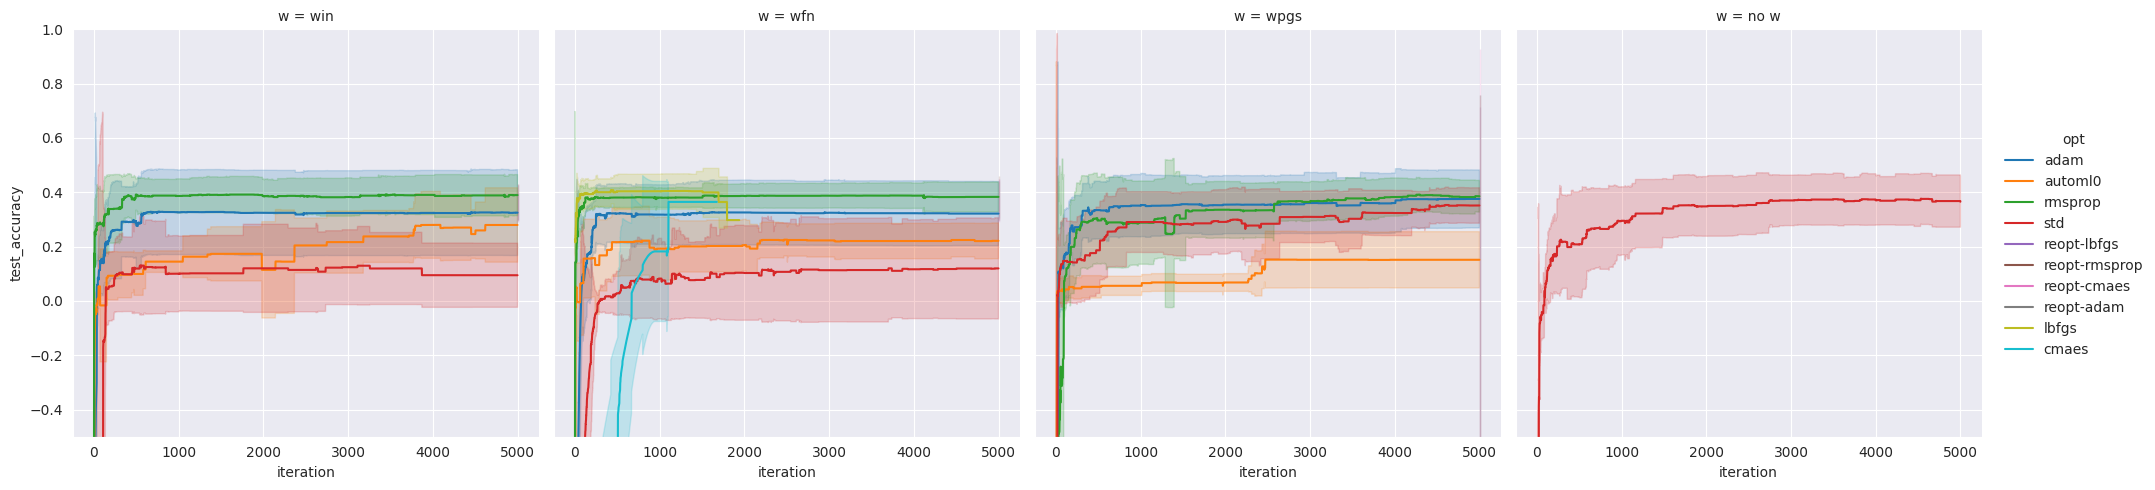

In [41]:
g = sns.relplot(df, x="iteration", y="test_accuracy", hue="opt", kind="line", col="w", errorbar="sd")
g.set(ylim=(-0.5, 1))
plt.show()

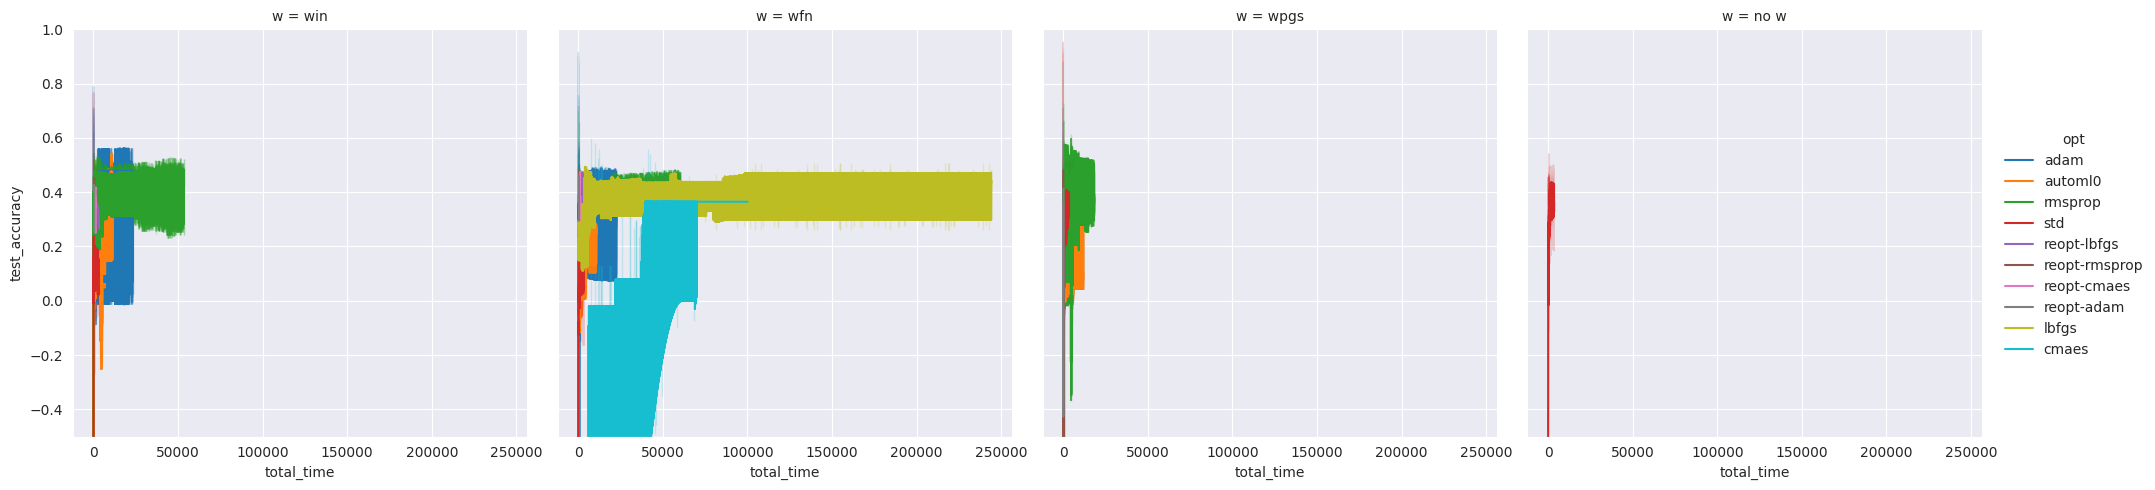

In [42]:
g = sns.relplot(df, x="total_time", y="test_accuracy", hue="opt", kind="line", col="w", errorbar="sd")
g.set(ylim=(-0.5, 1))
plt.show()

In [43]:
# final_df = df[df["iteration"] >= 4999]
max_iter = df.groupby(["w", "opt", "seed"])["iteration"].transform("max")
final_df = df[df["iteration"] == max_iter]
final_df

,iteration,max_fitness,test_accuracy,time,seed,w,opt,total_time
4999,4999.0,0.570533,0.300261,4.768574,0,win,adam,23147
9999,4999.0,0.290378,0.155168,2.337656,0,win,automl0,11089
14999,4999.0,0.579337,0.283990,10.170500,0,win,rmsprop,53436
19999,4999.0,0.025139,0.013838,0.636771,0,win,std,3275
20000,5000.0,0.533971,0.267311,3363.386635,0,win,reopt-lbfgs,3363
...,...,...,...,...,...,...,...,...
311543,4999.0,0.487611,0.226672,0.691196,0,no w,std,3510
316543,4999.0,0.494231,0.340562,0.719185,1,no w,std,3507
321543,4999.0,0.540352,0.361793,0.629373,2,no w,std,3504
326543,4999.0,0.514195,0.430271,0.593010,3,no w,std,3511


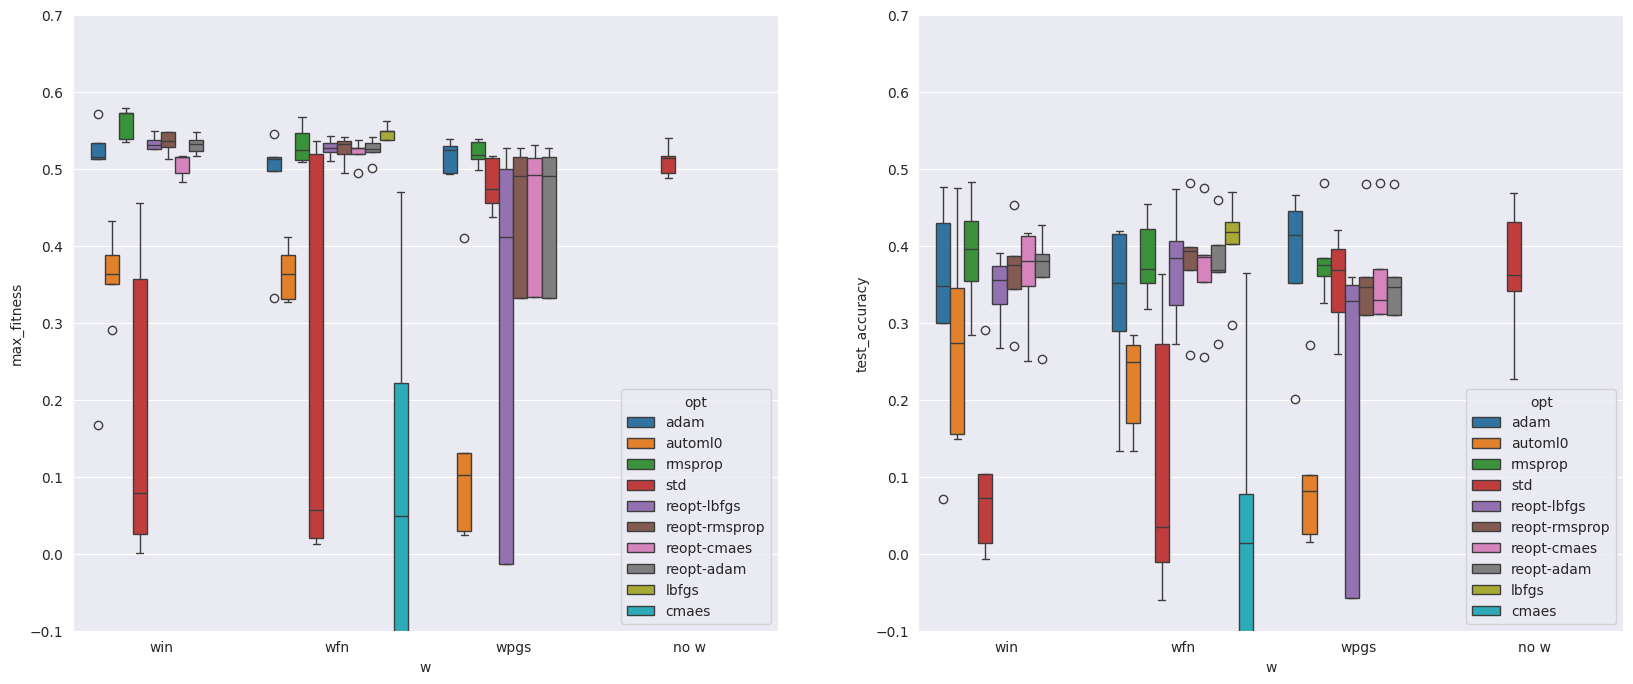

In [44]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))
for idx, y in enumerate(["max_fitness", "test_accuracy"]):
    sns.boxplot(final_df, x="w", y=y, hue="opt", ax=axes[idx])
    axes[idx].set_ylim([-0.1, .7])
plt.show()

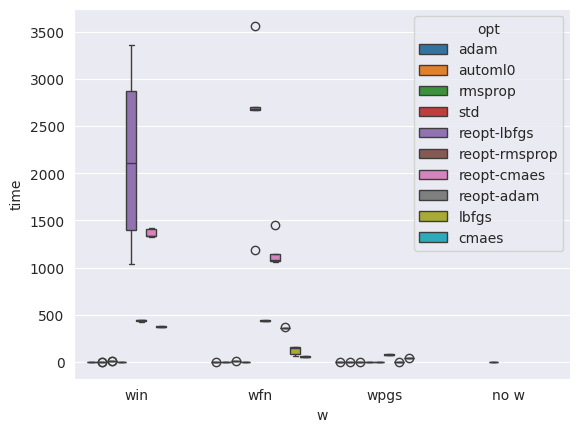

In [45]:
sns.boxplot(final_df, x="w", y="time", hue="opt")
plt.show()